In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [71]:
data=pd.read_csv("../data/preprocessed_data.csv")

In [72]:
data

,Airline,Source,Destination,Duration,stops,class,depature time,arrival time,Price,Date,Season
0,Iberia,ROM,CMN,580,1,business,Morning,Night,4135.95,2024-03-17,Spring
1,Transavia,ROM,CMN,590,1,economy,Early Morning,Afternoon,2443.35,2024-06-01,Summer
2,Lufthansa,ROM,CMN,570,2,economy,Afternoon,Late Night,2156.70,2024-09-03,Autumn
3,Egypt Air,IST,ROM,640,1,business,Late Night,Afternoon,5561.01,2024-02-10,Winter
4,TAROM,IST,PAR,350,1,business,Morning,Afternoon,8097.18,2024-04-18,Spring
...,...,...,...,...,...,...,...,...,...,...,...
4363,Pegasus Airlines,IST,PAR,230,0,economy,Afternoon,Afternoon,3559.92,2024-09-03,Autumn
4364,Iberia,ROM,CMN,505,2,economy,Early Morning,Afternoon,2429.70,2024-01-12,Winter
4365,Turkish Airlines,IST,ROM,160,0,economy,Afternoon,Afternoon,3628.17,2024-08-16,Summer
4366,ITA Airways,ROM,IST,150,0,economy,Morning,Afternoon,1911.00,2024-10-19,Autumn


### data vizualization

Text(0, 0.5, 'Fréquence')

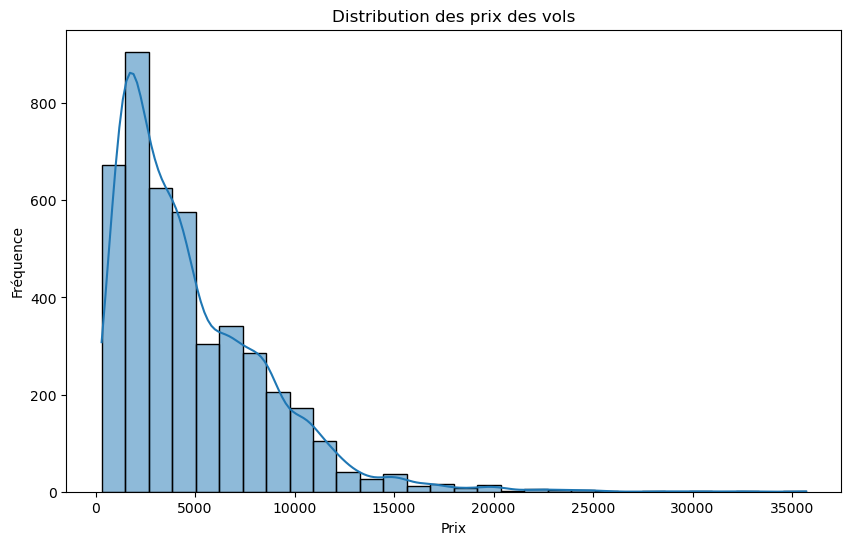

In [73]:
# Create a histogram with a KDE plot for price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'],bins=30, kde=True)
plt.title('Distribution des prix des vols')
plt.xlabel('Prix')
plt.ylabel('Fréquence')

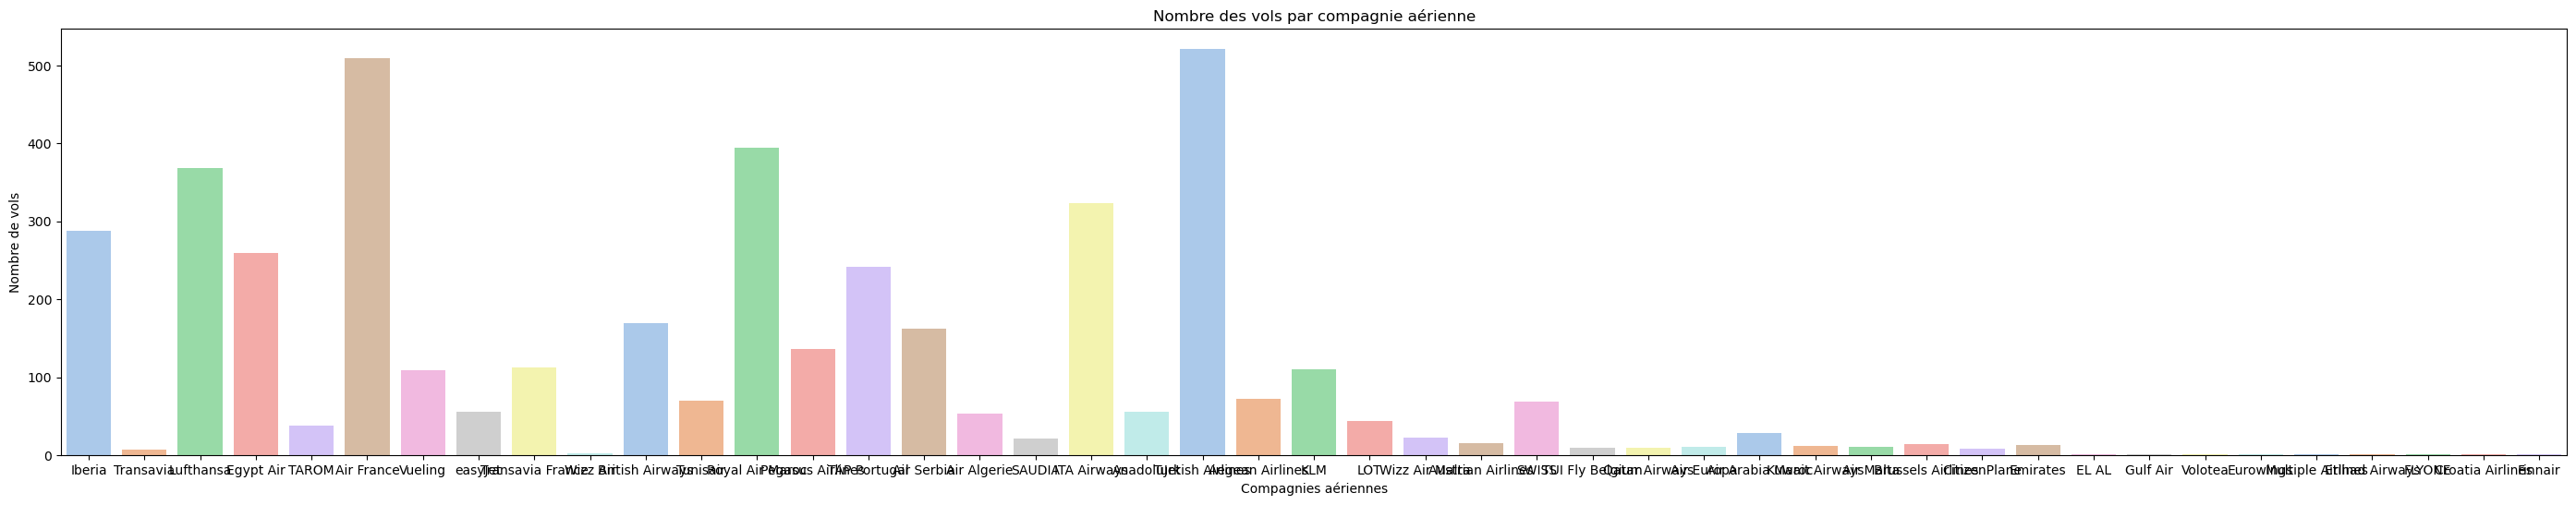

In [74]:
# Create a count plot for airline distribution
plt.figure(figsize=(35, 6))
sns.countplot(x='Airline', data=data, palette="pastel")
plt.title('Nombre des vols par compagnie aérienne')
plt.xlabel('Compagnies aériennes')
plt.ylabel('Nombre de vols')
plt.show()

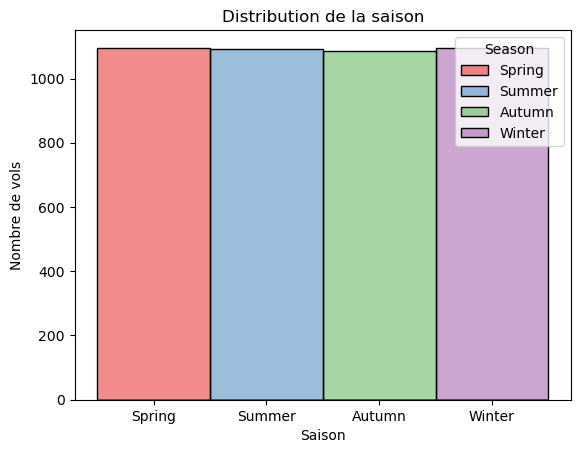

In [75]:
sns.histplot(data=data, x='Season', kde=False, bins=20, hue='Season', palette='Set1')
plt.title('Distribution de la saison')
plt.xlabel('Saison')
plt.ylabel('Nombre de vols')
plt.show()

Text(0, 0.5, 'Prix m')

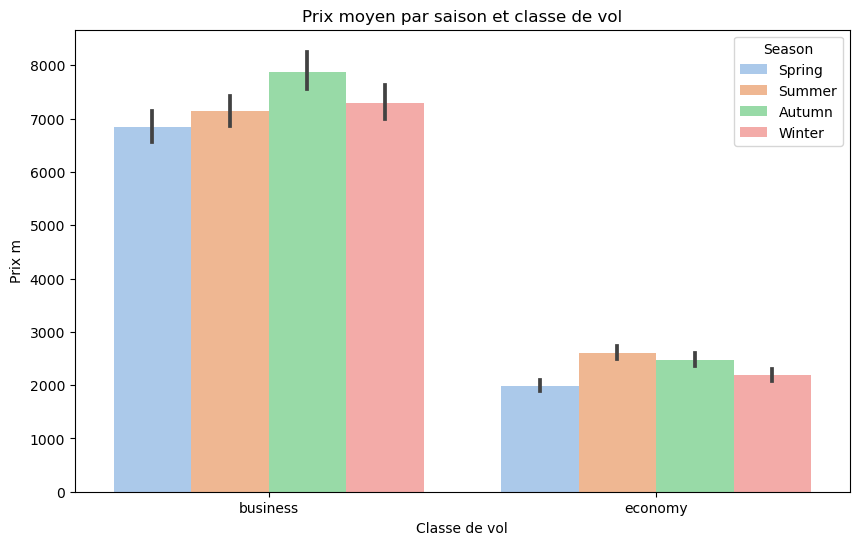

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='Price', hue='Season', data=data,palette="pastel")
plt.title('Prix moyen par saison et classe de vol')
plt.xlabel('Classe de vol')
plt.ylabel('Prix m')

In [77]:
fig = px.box(data, 
             x="depature time", 
             y="Price", 
             color="Season", 
             facet_col="arrival time", 
             title="Répartition des prix par heure de départ, heure d’arrivée et saison",
             labels={"Prix": "Prix", "Heure de départ": "Heure de départ", "Heure d'arrivée": "Heure d'arrivée", "Saison": "Saison"},
             category_orders={"Heure de départ": sorted(data['depature time'].unique()), 
                              "Heure d'arrivée": sorted(data['arrival time'].unique()),
                              "Saison": sorted(data['Season'].unique())})

fig.update_layout(
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

fig.show()


In [78]:


fig = px.violin(data, 
                x='class', 
                y='Price', 
                box=True,
                points='all',
                title='Price Distribution by Class',
                labels={'Class': 'Flight Class', 'Price': 'Price (currency)'},
                template='plotly_dark')

fig.show()



In [79]:

fig = px.scatter(data, 
                 x='depature time',  # Assuming there is a typo in your column name 'depature time'
                 y='Price', 
                 color='Season',
                 size='Price',
                 facet_row='arrival time',
                 title='Price vs. Departure Time and Arrival Time',
                 template='plotly_dark',
                 height=800)  # Increase the height of the plot

# Modify the facet row titles
for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split('=')[-1].strip()

fig.show()


In [80]:


fig = px.violin(data, 
                x='stops', 
                y='Price', 
                color='stops',
                title='Violin Plot of Price by Stops',
                template='plotly_dark')

fig.show()


In [81]:


fig = px.bar(data.groupby('Airline')['Price'].mean().reset_index(), 
             x='Airline', 
             y='Price',
             title='Average Price by Airline',
             template='plotly_dark')

fig.show()


In [82]:


# Assuming your DataFrame is named 'data'
fig = px.imshow(data.groupby(['Season', 'depature time'])['Price'].mean().unstack(), 
                x=data['depature time'].unique(),
                y=data['Season'].unique(),
                title='Heatmap of Average Price by Season and Departure Time',
                template='plotly_dark')

fig.show()



Text(0.5, 0, 'Durée')

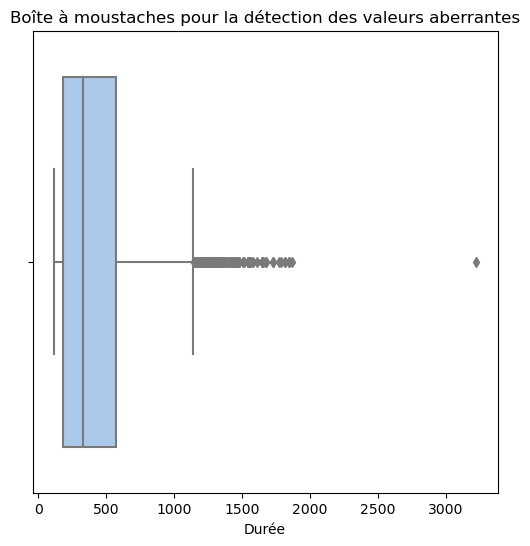

In [83]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=data['Duration'],palette="pastel")
plt.title('Boîte à moustaches pour la détection des valeurs aberrantes')
plt.xlabel('Durée')


## Supprimer les valeurs aberrantes

In [84]:
# get quantile to deal with outliers
lower = data['Duration'].quantile(0.25)
upper =data['Duration'].quantile(0.75)
low = data['Duration'] < lower
up = data['Duration'] > upper
data['Duration'] = data['Duration'][~(low|up)]
data.dropna(inplace=True)
data.reset_index(drop = True,inplace=True)

## Boite à moustache après la suppression des valeurs aberrantes

Text(0.5, 0, 'Durée')

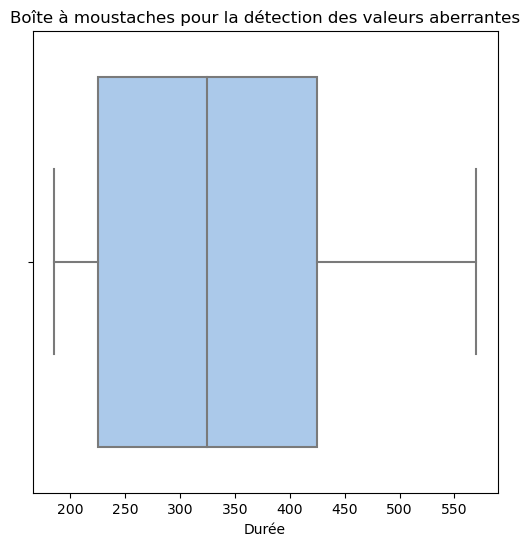

In [85]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=data['Duration'],palette="pastel")
plt.title('Boîte à moustaches pour la détection des valeurs aberrantes')
plt.xlabel('Durée')

# Encodage des valeurs catégorielles

## label encoding

In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

le=LabelEncoder()
ordinal_variables=['Airline','class','depature time','arrival time','Season']
data[ordinal_variables] = data[ordinal_variables].apply(lambda col: le.fit_transform(col))

## one hot encoding

In [89]:
#OneHot Encoding for nominal varibales
final_df= pd.get_dummies(data, columns=['Source', 'Destination'])
final_df

,Airline,Duration,stops,class,depature time,arrival time,Price,Date,Season,Source_CMN,Source_IST,Source_PAR,Source_ROM,Destination_CMN,Destination_IST,Destination_PAR,Destination_ROM
0,19,570.0,2,1,0,3,2156.70,2024-09-03,0,0,0,0,1,1,0,0,0
1,24,350.0,1,0,4,0,8097.18,2024-04-18,1,0,1,0,0,0,0,1,0
2,19,505.0,1,1,2,3,3194.10,2024-07-04,2,0,1,0,0,1,0,0,0
3,4,525.0,1,1,0,5,1719.90,2024-01-12,3,0,0,0,1,1,0,0,0
4,19,505.0,1,0,2,3,5733.00,2024-07-04,2,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,4,475.0,1,0,4,2,6060.60,2024-06-01,2,1,0,0,0,0,0,0,1
2285,2,550.0,1,1,1,2,2511.60,2024-02-10,3,1,0,0,0,0,1,0,0
2286,10,510.0,1,0,4,2,6734.91,2024-08-16,2,0,0,1,0,0,0,0,1
2287,20,230.0,0,1,0,0,3559.92,2024-09-03,0,0,1,0,0,0,0,1,0


In [90]:
data=final_df

In [91]:
final_df.drop(columns="Date",inplace=True)

In [92]:
data

,Airline,Duration,stops,class,depature time,arrival time,Price,Season,Source_CMN,Source_IST,Source_PAR,Source_ROM,Destination_CMN,Destination_IST,Destination_PAR,Destination_ROM
0,19,570.0,2,1,0,3,2156.70,0,0,0,0,1,1,0,0,0
1,24,350.0,1,0,4,0,8097.18,1,0,1,0,0,0,0,1,0
2,19,505.0,1,1,2,3,3194.10,2,0,1,0,0,1,0,0,0
3,4,525.0,1,1,0,5,1719.90,3,0,0,0,1,1,0,0,0
4,19,505.0,1,0,2,3,5733.00,2,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,4,475.0,1,0,4,2,6060.60,2,1,0,0,0,0,0,0,1
2285,2,550.0,1,1,1,2,2511.60,3,1,0,0,0,0,1,0,0
2286,10,510.0,1,0,4,2,6734.91,2,0,0,1,0,0,0,0,1
2287,20,230.0,0,1,0,0,3559.92,0,0,1,0,0,0,0,1,0


In [93]:
final_df.to_csv("..\data\\flight_data.csv",index=False)